# Data Scaling

In [121]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.datasets import load_iris
plt.rcParams['font.family']='Malgun Gothic'
plt.rcParams['axes.unicode_minus']=False

scikit-learn에서 제공하는 iris dataset 가져오기

In [122]:
iris=load_iris()
data=iris.data
data=pd.DataFrame(data,columns=iris.feature_names)

In [123]:
#Dataset 확인
data

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [124]:
#column name 변경
data=data.rename(columns={'sepal length (cm)':'꽃받침길이'})
data=data.rename(columns={'sepal width (cm)':'꽃받침너비'})
data=data.rename(columns={'petal length (cm)':'꽃잎길이'})
data=data.rename(columns={'petal width (cm)':'꽃잎너비'})

In [125]:
#mean값과 variance값 확인
print(data['꽃받침길이'].mean())
print(data['꽃받침길이'].var())
print(data['꽃받침너비'].mean())
print(data['꽃받침너비'].var())
print(data['꽃잎길이'].mean())
print(data['꽃잎길이'].var())
print(data['꽃잎너비'].mean())
print(data['꽃잎너비'].var())

5.843333333333335
0.6856935123042505
3.057333333333334
0.1899794183445188
3.7580000000000027
3.1162778523489942
1.199333333333334
0.5810062639821029


In [126]:
sl=data['꽃받침길이']
sl=sl.to_frame(name='꽃받침길이')
sl.reset_index(inplace=True)
sl.drop('index',axis=1,inplace=True)
sl.reset_index(inplace=True)

In [127]:
frequency=sl['꽃받침길이'].value_counts()
frequency=frequency.to_frame(name='빈도')
graph01=frequency.sort_index()

## 기본 Dataset

In [128]:
sl=data['꽃받침길이'].to_frame(name='꽃받침길이')
frequencysl1=sl.value_counts()
frequencysl1=frequencysl1.to_frame(name='빈도')
graphsl1=frequencysl1.sort_index()
graphsl1.reset_index(inplace=True)
#
sw=data['꽃받침너비'].to_frame(name='꽃받침너비')
frequencysw1=sw.value_counts()
frequencysw1=frequencysw1.to_frame(name='빈도')
graphsw1=frequencysw1.sort_index()
graphsw1.reset_index(inplace=True)
#
pl=data['꽃잎길이'].to_frame(name='꽃잎길이')
frequencypl1=pl.value_counts()
frequencypl1=frequencypl1.to_frame(name='빈도')
graphpl1=frequencypl1.sort_index()
graphpl1.reset_index(inplace=True)
#
pw=data['꽃잎너비'].to_frame(name='꽃잎너비')
frequencypw1=pw.value_counts()
frequencypw1=frequencypw1.to_frame(name='빈도')
graphpw1=frequencypw1.sort_index()
graphpw1.reset_index(inplace=True)

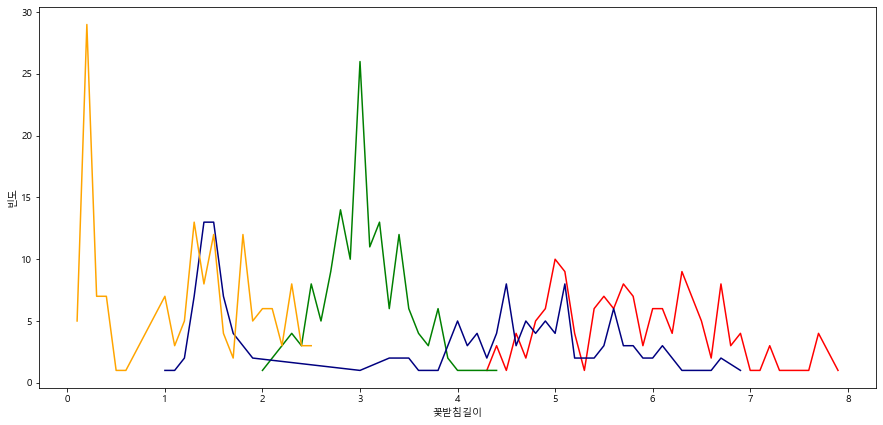

In [129]:
plt.figure(figsize=(15,7))
sns.lineplot(data=graphsl1,x='꽃받침길이',y='빈도',color='red')
sns.lineplot(data=graphsw1,x='꽃받침너비',y='빈도',color='green')
sns.lineplot(data=graphpl1,x='꽃잎길이',y='빈도',color='navy')
sns.lineplot(data=graphpw1,x='꽃잎너비',y='빈도',color='orange')
plt.savefig("1.png")

In [130]:
#Scaler 정의
s=StandardScaler()
mm=MinMaxScaler()
r=RobustScaler()

## 꽃받침길이의 Scaler별로의 분포비교

<AxesSubplot:xlabel='0'>

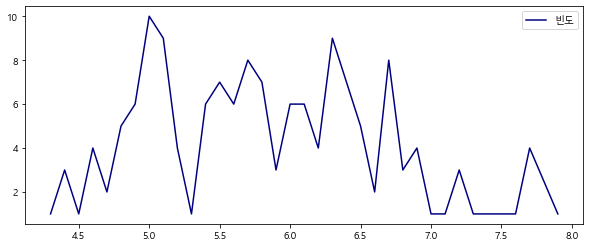

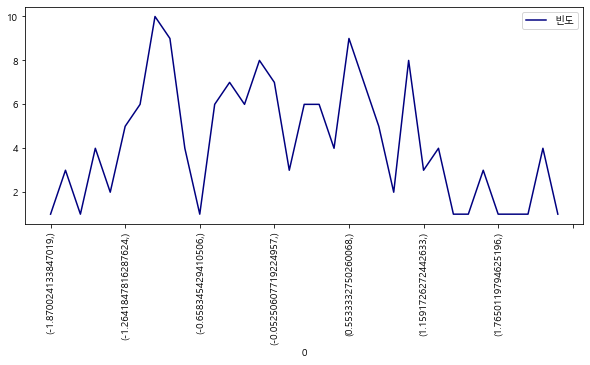

In [131]:
#StandardScaler
sl=data['꽃받침길이'].to_frame(name='꽃받침길이')
s01=s.fit(sl)
s01_transform=s01.transform(sl)
s01_transform=pd.DataFrame(s01_transform)
frequency01=s01_transform.value_counts()
frequency01=frequency01.to_frame(name='빈도')
graph2=frequency01.sort_index()
graph01.plot(color='navy',figsize=(10,4))
graph2.plot(color='navy',figsize=(10,4),rot=90)

<AxesSubplot:xlabel='0'>

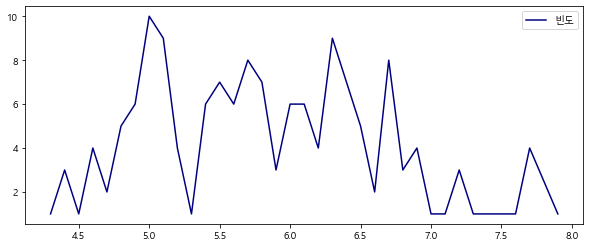

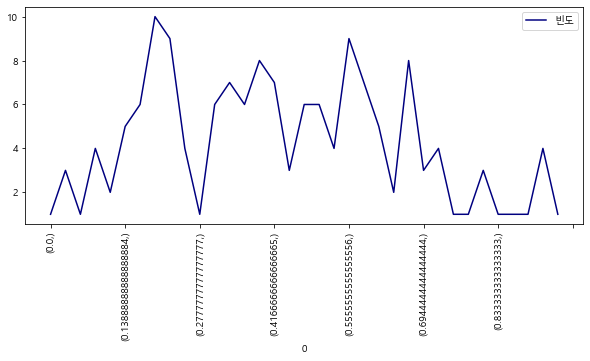

In [132]:
#minMAXscaler
s02=mm.fit(sl)
s02_transform=s02.transform(sl)
s02_transform=pd.DataFrame(s02_transform)
frequency02=s02_transform.value_counts()
frequency02=frequency02.to_frame(name='빈도')
graph3=frequency02.sort_index()
graph01.plot(color='navy',figsize=(10,4))
graph3.plot(color='navy',figsize=(10,4),rot=90)

<AxesSubplot:xlabel='0'>

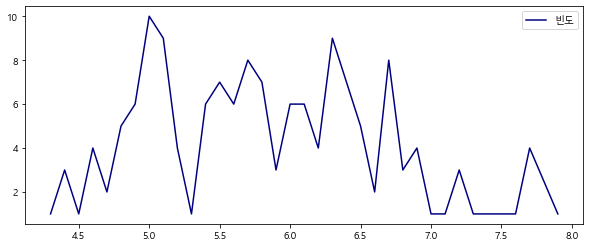

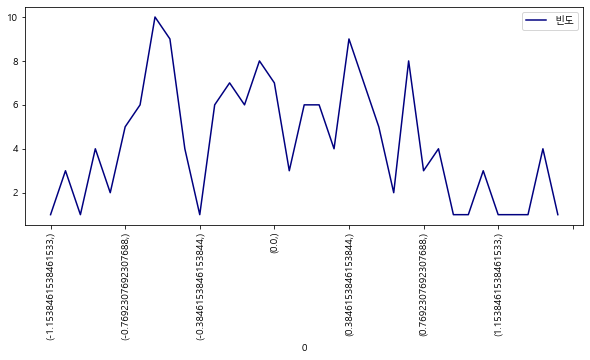

In [133]:
#Robust Scaler
s03=r.fit(sl)
s03_transform=s03.transform(sl)
s03_transform=pd.DataFrame(s03_transform)
frequency03=s03_transform.value_counts()
frequency03=frequency03.to_frame(name='빈도')
graph4=frequency03.sort_index()
graph01.plot(color='navy',figsize=(10,4))
graph4.plot(color='navy',figsize=(10,4),rot=90)

In [134]:
graph2.reset_index(inplace=True)
graph3.reset_index(inplace=True)
graph4.reset_index(inplace=True)

<AxesSubplot:xlabel='0', ylabel='빈도'>

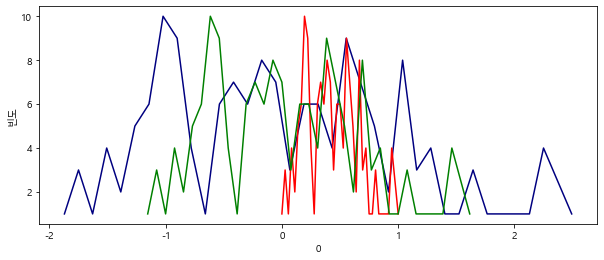

In [135]:
plt.figure(figsize=(10,4))
sns.lineplot(data=graph2,x=0,y='빈도',color='navy')
sns.lineplot(data=graph3,x=0,y='빈도',color='red')
sns.lineplot(data=graph4,x=0,y='빈도',color='green')

### Robust Scaler

In [136]:
sw=data['꽃받침너비'].to_frame(name='꽃받침너비')
sw1=r.fit(sw)
sw1_transform=sw1.transform(sw)
sw1_transform=pd.DataFrame(sw1_transform)
frequencysw1=sw1_transform.value_counts()
frequencysw1=frequencysw1.to_frame(name='빈도')
graphsw1=frequencysw1.sort_index()
graphsw1.reset_index(inplace=True)

In [137]:
pl=data['꽃잎길이'].to_frame(name='꽃잎길이')
pl1=r.fit(pl)
pl1_transform=pl1.transform(pl)
pl1_transform=pd.DataFrame(pl1_transform)
frequencypl1=pl1_transform.value_counts()
frequencypl1=frequencypl1.to_frame(name='빈도')
graphpl1=frequencypl1.sort_index()
graphpl1.reset_index(inplace=True)

In [138]:
pw=data['꽃잎너비'].to_frame(name='꽃잎너비')
pw1=r.fit(pw)
pw1_transform=pw1.transform(pw)
pw1_transform=pd.DataFrame(pw1_transform)
frequencypw1=pw1_transform.value_counts()
frequencypw1=frequencypw1.to_frame(name='빈도')
graphpw1=frequencypw1.sort_index()
graphpw1.reset_index(inplace=True)

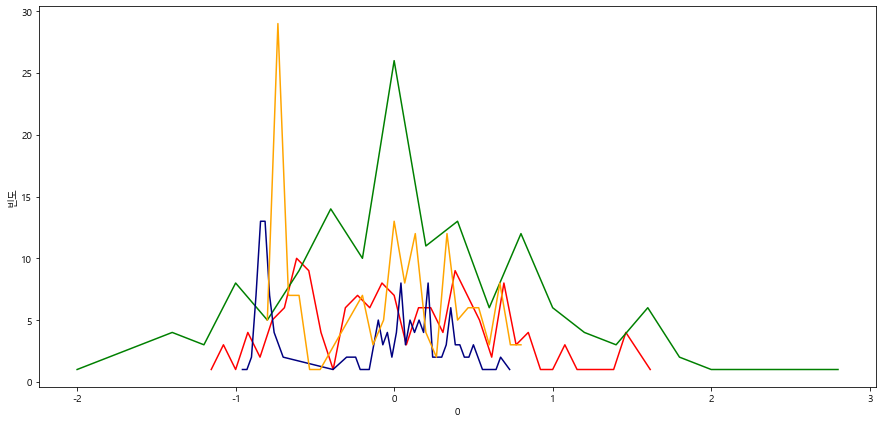

In [139]:
plt.figure(figsize=(15,7))
sns.lineplot(data=graph4,x=0,y='빈도',color='red')
sns.lineplot(data=graphsw1,x=0,y='빈도',color='green')
sns.lineplot(data=graphpl1,x=0,y='빈도',color='navy')
sns.lineplot(data=graphpw1,x=0,y='빈도',color='orange')
plt.savefig("robust.png")

### minMAXScaler

In [140]:
sw=data['꽃받침너비'].to_frame(name='꽃받침너비')
sw1=mm.fit(sw)
sw1_transform=sw1.transform(sw)
sw1_transform=pd.DataFrame(sw1_transform)
frequencysw1=sw1_transform.value_counts()
frequencysw1=frequencysw1.to_frame(name='빈도')
graphsw1=frequencysw1.sort_index()
graphsw1.reset_index(inplace=True)
#
pl=data['꽃잎길이'].to_frame(name='꽃잎길이')
pl1=mm.fit(pl)
pl1_transform=pl1.transform(pl)
pl1_transform=pd.DataFrame(pl1_transform)
frequencypl1=pl1_transform.value_counts()
frequencypl1=frequencypl1.to_frame(name='빈도')
graphpl1=frequencypl1.sort_index()
graphpl1.reset_index(inplace=True)
#
pw=data['꽃잎너비'].to_frame(name='꽃잎너비')
pw1=mm.fit(pw)
pw1_transform=pw1.transform(pw)
pw1_transform=pd.DataFrame(pw1_transform)
frequencypw1=pw1_transform.value_counts()
frequencypw1=frequencypw1.to_frame(name='빈도')
graphpw1=frequencypw1.sort_index()
graphpw1.reset_index(inplace=True)

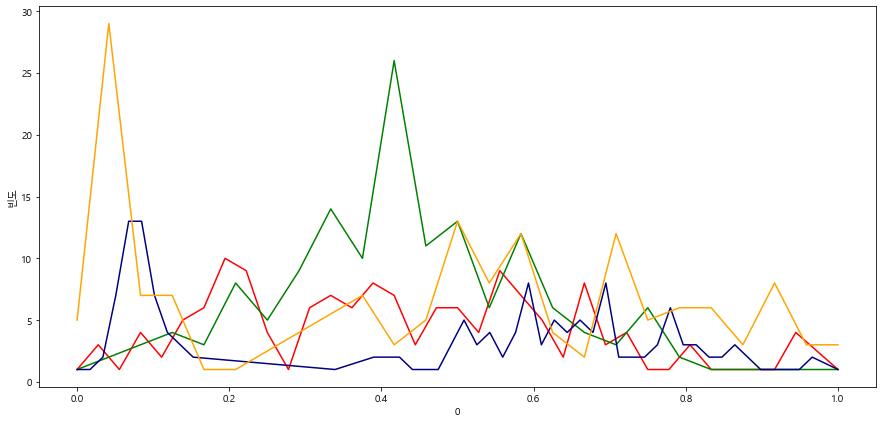

In [141]:
plt.figure(figsize=(15,7))
sns.lineplot(data=graph3,x=0,y='빈도',color='red')
sns.lineplot(data=graphsw1,x=0,y='빈도',color='green')
sns.lineplot(data=graphpl1,x=0,y='빈도',color='navy')
sns.lineplot(data=graphpw1,x=0,y='빈도',color='orange')
plt.savefig("minMAX.png")

### Standard Scaler

In [142]:
sw=data['꽃받침너비'].to_frame(name='꽃받침너비')
sw1=s.fit(sw)
sw1_transform=sw1.transform(sw)
sw1_transform=pd.DataFrame(sw1_transform)
frequencysw1=sw1_transform.value_counts()
frequencysw1=frequencysw1.to_frame(name='빈도')
graphsw1=frequencysw1.sort_index()
graphsw1.reset_index(inplace=True)
#
pl=data['꽃잎길이'].to_frame(name='꽃잎길이')
pl1=s.fit(pl)
pl1_transform=pl1.transform(pl)
pl1_transform=pd.DataFrame(pl1_transform)
frequencypl1=pl1_transform.value_counts()
frequencypl1=frequencypl1.to_frame(name='빈도')
graphpl1=frequencypl1.sort_index()
graphpl1.reset_index(inplace=True)
#
pw=data['꽃잎너비'].to_frame(name='꽃잎너비')
pw1=s.fit(pw)
pw1_transform=pw1.transform(pw)
pw1_transform=pd.DataFrame(pw1_transform)
frequencypw1=pw1_transform.value_counts()
frequencypw1=frequencypw1.to_frame(name='빈도')
graphpw1=frequencypw1.sort_index()
graphpw1.reset_index(inplace=True)

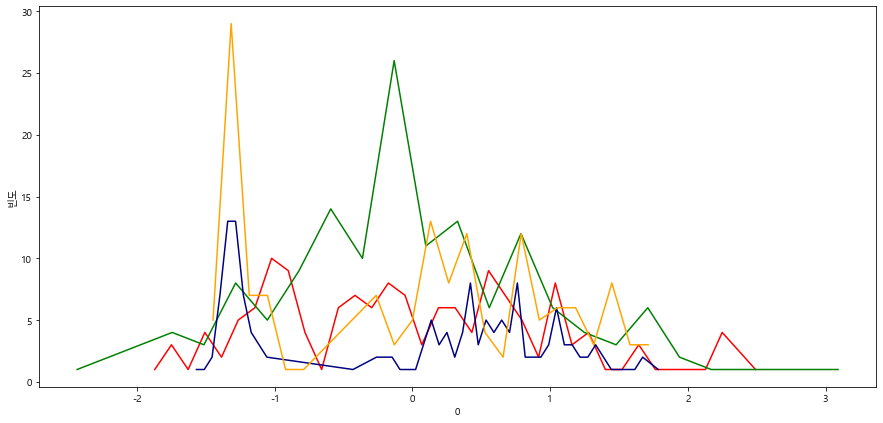

In [143]:
plt.figure(figsize=(15,7))
sns.lineplot(data=graph2,x=0,y='빈도',color='red')
sns.lineplot(data=graphsw1,x=0,y='빈도',color='green')
sns.lineplot(data=graphpl1,x=0,y='빈도',color='navy')
sns.lineplot(data=graphpw1,x=0,y='빈도',color='orange')
plt.savefig("SS.png")